In [1]:

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np
from math import sqrt
from numpy import log
from pandas import Series


# stats models are used for the ploting statistics models in the notebook
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels as sm

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
from datetime import datetime
import subprocess

# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
ds_gold = 'Indian rupee'
#ds_etf = 'Close'
date_format = '%Y-%m-%d'
df = pd.read_csv("data_inr.csv")
df = df[['Name', ds_gold]]
df['Name'] = [datetime.strptime(i, date_format) for i in df['Name']]
df.set_index('Name')
# df.index = pd.to_datetime(df.index, format=date_format)
print(df.columns)
dd =df


Index(['Name', 'Indian rupee'], dtype='object')


In [3]:
df.iloc[1:51]

,Name,Indian rupee
1,1979-01-31,1852.8
2,1979-02-28,2010.4
3,1979-03-30,1974.9
4,1979-04-30,1960.9
5,1979-05-31,2119.4
6,1979-06-29,2248.9
7,1979-07-31,2309.7
8,1979-08-31,2409.8
9,1979-09-28,2865.0
10,1979-10-31,3204.0


In [4]:
df = df.dropna() #to drop the missing rows

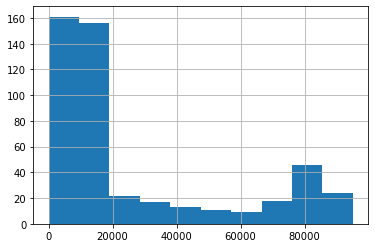

-inf 11.46239188192892


C:\Users\Rishav\anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
df[ds_gold].hist()
plt.show()
log_transform = log(df[ds_gold])
print(min(log_transform), max(log_transform))

C:\Users\Rishav\anaconda3\envs\tensorflow_env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


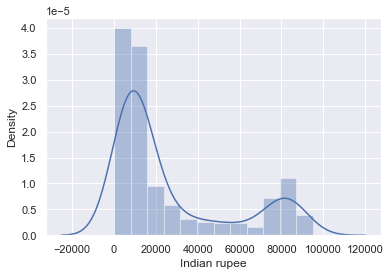

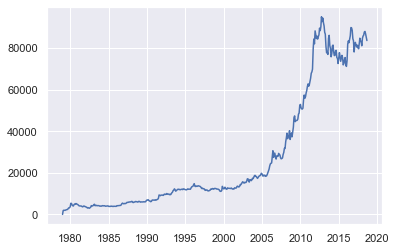

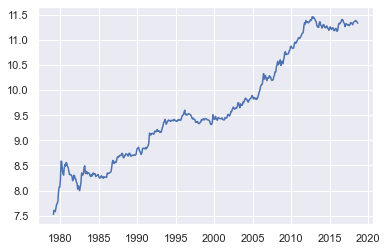

In [6]:
sns.set()
sns.distplot(df[ds_gold])
plt.show()

plt.plot(df['Name'], df[ds_gold])
plt.show()

plt.plot(df['Name'], log_transform)
plt.show()

# Can be used to show non stationary


In [7]:
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]

In [8]:
df['S_1']

12      3084.166667
13      3373.100000
14      4091.100000
15      4792.166667
16      5052.066667
           ...     
472    85562.500000
473    86553.100000
474    87306.266667
475    87539.400000
476    86676.000000
Name: S_1, Length: 465, dtype: float64

In [9]:
df['S_2']

12      2178.275000
13      2489.258333
14      2781.358333
15      3054.383333
16      3265.766667
           ...     
472    82820.716667
473    83323.833333
474    83971.758333
475    84443.850000
476    84897.450000
Name: S_2, Length: 465, dtype: float64

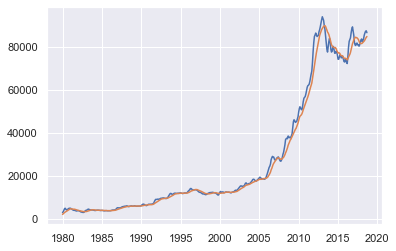

12    3731.8
13    5358.0
14    5286.7
15    4511.5
16    4164.4
Name: Indian rupee, dtype: float64

In [10]:
plt.plot(df['Name'], df['S_1'])
plt.plot(df['Name'], df["S_2"])
plt.show()


# dependent variable
y = df[ds_gold]
y.head()

In [11]:
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t, shuffle=False)

In [12]:
# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

Gold Price = 1.0 * 2 Month Moving Average 0.04 * 1 Month Moving Average + -209.53


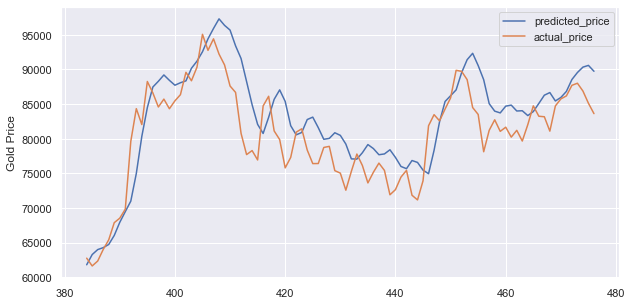

In [13]:
# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

In [14]:
# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))

# We observe significantly different accuracies for same dataset in USD and INR.
# The reason for this difference could be attributed to the currency

R square for regression 61.35


4439.456721189546

In [15]:
# Check stationarity
X = df[ds_gold]
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

#Augmented Dickey-Fuller Test
result_of_adfuller = adfuller(df[ds_gold])
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

# we can conclude it has time dependent structure and cannot reject null hypothesis.


mean1=7684.790948, mean2=47413.805150
variance1=12484023.293121, variance2=869346629.630404
ADF Statistic: 0.900990
p-value: 0.993103
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [16]:
# Now taking log transform
log_transform = log(df[ds_gold])
result_of_adfuller = adfuller(log_transform)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.391242
p-value: 0.981164
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


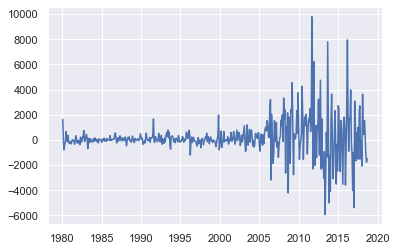

ADF Statistic: -4.809915
p-value: 0.000052
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [17]:
# To remove trends, differencing of order 1
k = df[ds_gold].diff()
plt.plot(df['Name'], k)
plt.show()
# print(k.head())
k = k.dropna()

# check stationarity after differencing
result_of_adfuller = adfuller(k)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))


# So now we can say with 1 % confidence level that its stationary
# We can do other stuff now

           S_1        S_2
25 -168.633333  81.116667
26 -227.433333 -77.333333
27 -241.166667 -98.041667
28 -204.033333 -34.866667
29 -107.400000  -4.716667


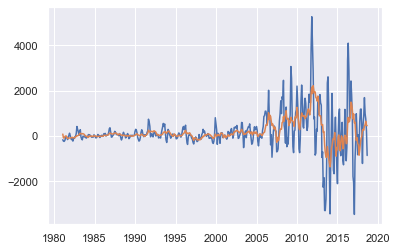

25   -275.2
26   -319.8
27    -17.1
28     14.7
29    -73.8
Name: Indian rupee, dtype: float64

In [18]:
# Again regression
df[ds_gold] = k
# Finding moving average of past 3 days and 9 days
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]
X.head()
print(X.head())
plt.plot(df['Name'], df['S_1'])
plt.plot(df['Name'], df["S_2"])
plt.show()

df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()

# dependent variable
y = df[ds_gold]
y.head()
# print(y.head())



Gold Price = -0.18 * 2 Month Moving Average 0.67 * 1 Month Moving Average + 90.8


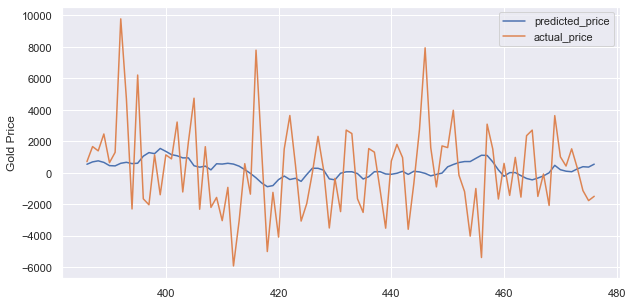

In [19]:
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()



In [20]:
# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))

R square for regression -0.84


2816.4197674482084

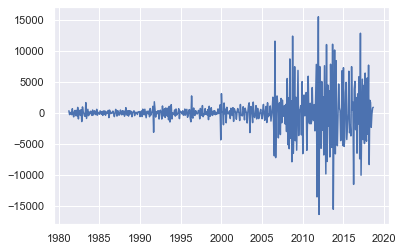

ADF Statistic: -42.259410
p-value: 0.000000
Critical Values:
	1%: -3.445
	5%: -2.868
	10%: -2.570


In [21]:
# Trying 2nd order differencing
k = df[ds_gold].diff().diff()
plt.plot(df['Name'], k)
plt.show()
# print(k.head())
k = k.dropna()

# check stationarity after differencing
result_of_adfuller = adfuller(k)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))


           S_1        S_2
39  122.333333  18.358333
40 -174.466667 -50.983333
41  270.000000  46.116667
42 -184.133333 -24.016667
43  113.100000   1.850000


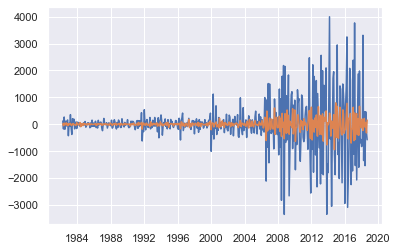

In [22]:
# Again regression
df[ds_gold] = k
# Finding moving average of past 3 days and 9 days
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]
X.head()
print(X.head())
plt.plot(df['Name'], df['S_1'])
plt.plot(df['Name'], df["S_2"])
plt.show()


# dependent variable
y = df[ds_gold]
y.head()
# print(y.head())
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()


Gold Price = -1.75 * 2 Month Moving Average -4.81 * 1 Month Moving Average + 1.9


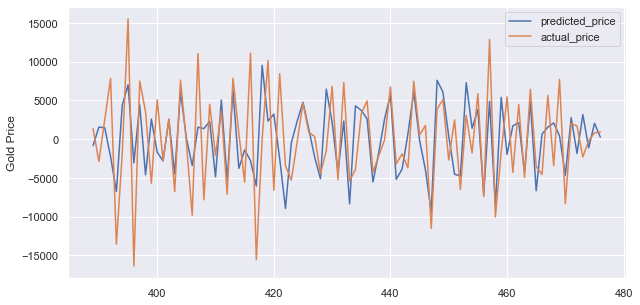

In [23]:
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

In [24]:
# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
print("RMSE: ",sqrt(mean_squared_error(y_test,predicted_price)))

R square for regression 29.55
RMSE:  5266.432728557324


C:\Users\Rishav\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


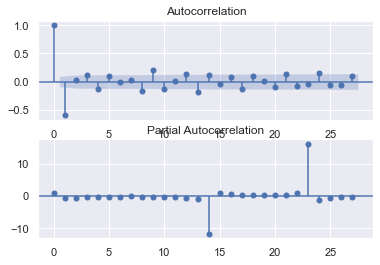

In [25]:
#ACF(autocorrelation function) and PACF(partial autocorrelation function) plots

series = df[ds_gold]
plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()

In [27]:
#from statsmodels.tsa.statespace import SARIMAX
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df[ds_gold].values,order=(2, 1, 2),seasonal_order=(2, 1, 2, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()

C:\Users\Rishav\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [28]:
results.summary()
df['sarimax_predict'] = results.predict()

In [29]:
results.predict

<bound method MLEResults.predict of <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper object at 0x000001DF5AB22C08>>

In [30]:
#df.plot(y = ['Indian rupee','sarimax_predict'], x = df['Name'])

In [31]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  438
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -3624.349
Date:                            Tue, 22 Dec 2020   AIC                           7266.697
Time:                                    20:23:27   BIC                           7302.575
Sample:                                         0   HQIC                          7280.908
                                            - 438                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5254      0.100     -5.250      0.000      -0.722      -0.329
ar.L2         -0.3235      0.091     -3.557      0.000      -0.502      -0.145
ma.L1         -1.9795      0.056    -35.569      0.000      -2.089      -1.870
ma.L2          0.9855      0.056     17.451      0.000       0.875       1.096
ar.S.L12      -0.5177      1.039     -0.498      0.618      -2.554       1.518
ar.S.L24       0.0796      0.159      0.500      0.617      -0.232       0.392
ma.S.L12      -0.3846      1.034     -0.372      0.710      -2.412       1.643
ma.S.L24      -0.4431      0.843     -0.526      0.599      -2.095       1.209
sigma2      8.932e+06   1.45e-07   6.14e+13      0.000    8.93e+06    8.93e+06
===================================================================================
Ljung-Box (L1) (Q):                   3.38   Jarque-Bera (JB):               462.42
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):              66.10   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.84e+30. Standard errors may be unstable.
"""

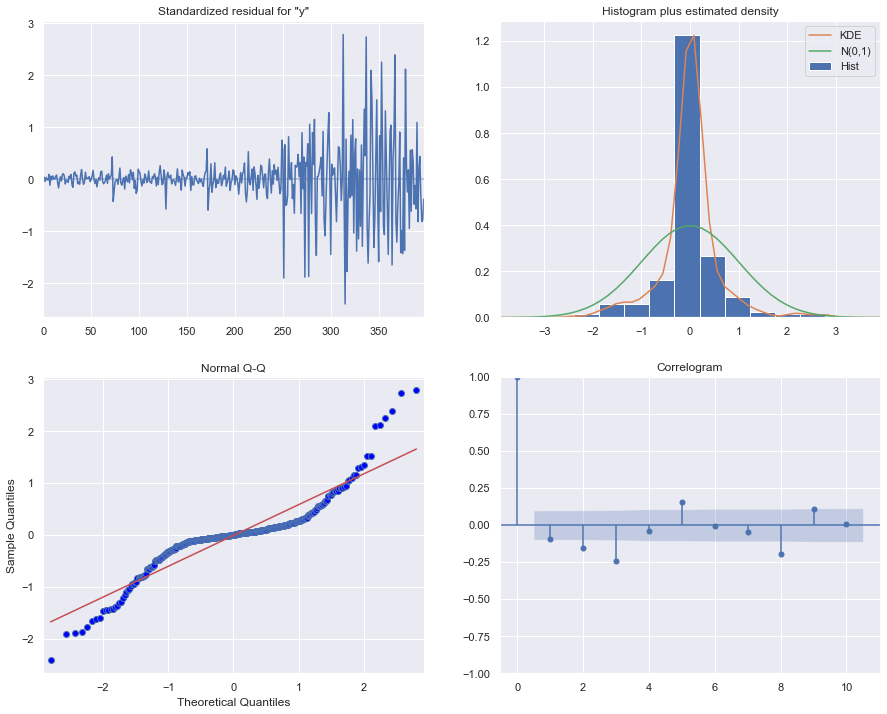

In [32]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [33]:
print("RMSE :     ",sqrt(mean_squared_error(df[ds_gold],df['sarimax_predict'])))
from sklearn.metrics import r2_score
print("R2 SCORE : ",r2_score(df[ds_gold],df['sarimax_predict']))

RMSE :      1695.1592265855584
R2 SCORE :  0.737918376387984


In [34]:
import datetime as dt

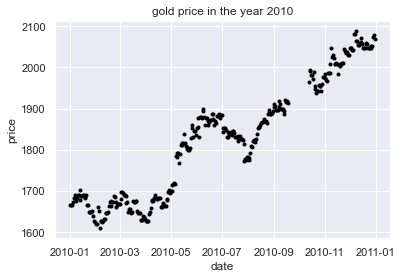

In [53]:
data2010 = pd.read_csv("dataset2010.csv")
x_10 = data2010.iloc[:,0]
y_10 = data2010.iloc[:,1]
new_10 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_10]
plt.plot(new_10,y_10, '.r',color='black')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2010')
plt.show()

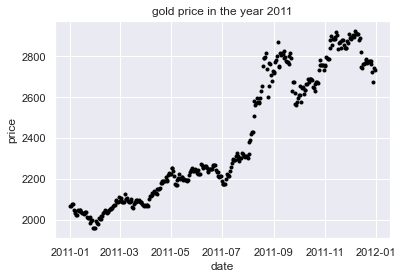

In [55]:
data2011 = pd.read_csv("dataset2011.csv")
x_11 = data2011.iloc[:,0]
y_11 = data2011.iloc[:,1]
new_11 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_11]
plt.plot(new_11,y_11, '.r',color='black')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2011')
plt.show()

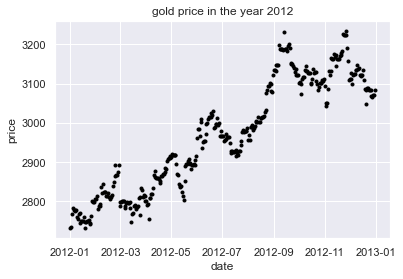

In [58]:
data2011 = pd.read_csv("dataset2012.csv")
x_12 = data2012.iloc[:,0]
y_12 = data2012.iloc[:,1]
new_12 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_11]
plt.plot(new_11,y_11, '.r',color='black')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2012')
plt.show()

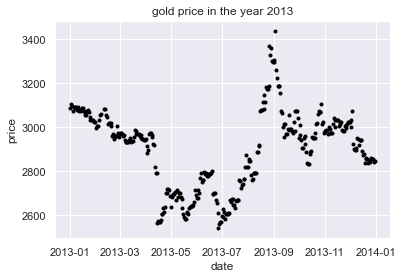

In [59]:
data2013 = pd.read_csv("dataset2013.csv")
x_13 = data2013.iloc[:,0]
y_13 = data2013.iloc[:,1]
new_13 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_13]
plt.plot(new_13,y_13, '.r',color='black')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2013')
plt.show()

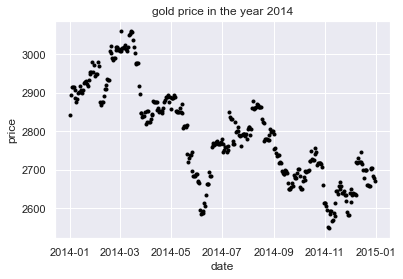

In [36]:
data2014 = pd.read_csv("dataset2014.csv")
x_14 = data2014.iloc[:,0]
y_14 = data2014.iloc[:,1]
new_14 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_14]
plt.plot(new_14,y_14, '.r',color='black')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2014')
plt.show()

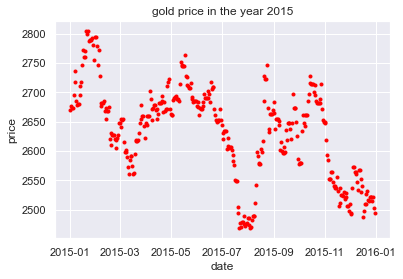

In [37]:
data2015 = pd.read_csv("dataset2015.csv")
x_15 = data2015.iloc[:,0]
y_15 = data2015.iloc[:,1]
new_15 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_15]
plt.plot(new_15,y_15, '.r',color='red')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2015')
plt.show()

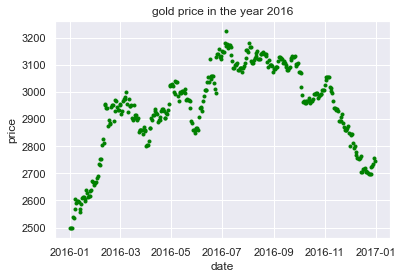

In [38]:
data2016 = pd.read_csv("dataset2016.csv") 
x_16 = data2016.iloc[:,0]
y_16 = data2016.iloc[:,1]
new_16 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_16]
plt.plot(new_16,y_16, '.r',color='green')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2016')
plt.show()

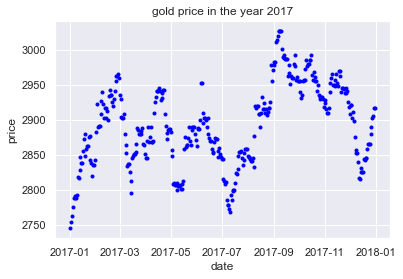

In [39]:
data2017 = pd.read_csv("dataset2017.csv") 
x_17 = data2017.iloc[:,0]
y_17 = data2017.iloc[:,1]
new_17 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_17]
plt.plot(new_17,y_17, '.r',color='blue')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2017')
plt.show()

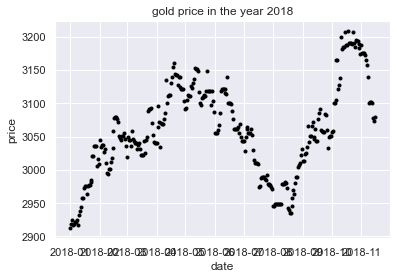

In [40]:
data = pd.read_csv("dataset2018.csv") 
data.head()
x_18 = data.iloc[:,0]
y_18 = data.iloc[:,1]
new_18 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_18]
plt.plot(new_18,y_18, '.r',color='black')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2018')
plt.show()

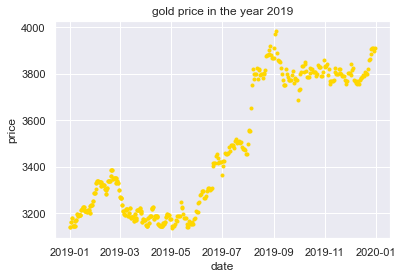

In [46]:
data = pd.read_csv("dataset2019.csv") 
data.head()
x_19 = data.iloc[:,0]
y_19 = data.iloc[:,1]
new_19 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_19]
plt.plot(new_19,y_19, '.r',color='gold')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2019')
plt.show()

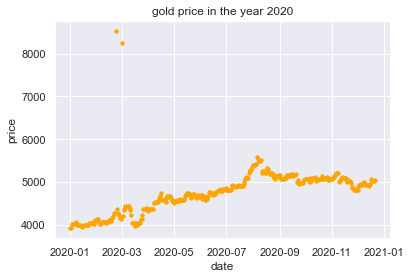

In [50]:
data = pd.read_csv("dataset2020.csv") 
data.head()
x_20 = data.iloc[:,0]
y_20 = data.iloc[:,1]
new_20 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_20]
plt.plot(new_20,y_20, '.r',color='orange')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2020')
plt.show()

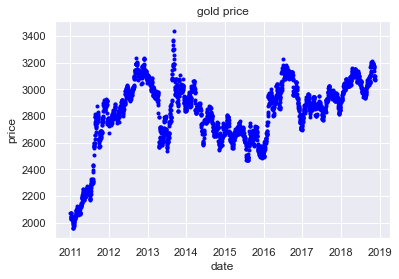

In [41]:
datafull = pd.read_csv("datasetfull.csv") #untill2018
x_14 = datafull.iloc[:,0]
y_14 = datafull.iloc[:,1]
new_14 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_14]
plt.plot(new_14,y_14, '.r',color='blue')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price')
plt.show()

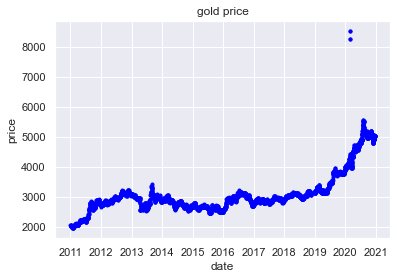

In [51]:
datafull = pd.read_csv("combinedall.csv")
x_14 = datafull.iloc[:,0]
y_14 = datafull.iloc[:,1]
new_14 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_14]
plt.plot(new_14,y_14, '.r',color='blue')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price')
plt.show()